In [1]:
import pandas as pd
import numpy as np
import mysql.connector as connection
#import MySQLdb
import matplotlib.pyplot as plt
import seaborn as sns
#from google.colab import files
import io
import warnings
warnings.filterwarnings('ignore')


In [2]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [ ]:
#databaseconnection

In [3]:
try:
    mydb = connection.connect(host="127.0.0.1", database = 'record',user="root", passwd="Howyoudoing@29",use_pure=True)
    query = "Select * from record_table;"
    result_dataFrame = pd.read_sql(query,mydb)
    mydb.close() #close the connection
except Exception as e:
    mydb.close()
    print(str(e))

In [4]:
result_dataFrame

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
574,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37,0
575,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10,1
576,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00,1
577,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00,1


In [5]:
df = result_dataFrame

<AxesSubplot:>

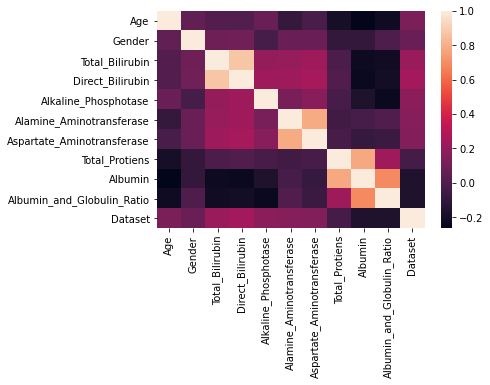

In [6]:
import seaborn as sns

sns.heatmap(df.corr())

In [7]:
null = pd.DataFrame({'Null Values' : df.isna().sum(), 'Percentage Null Values' : (df.isna().sum()) / (df.shape[0]) * (100)})
null

,Null Values,Percentage Null Values
Age,0,0.0
Gender,0,0.0
Total_Bilirubin,0,0.0
Direct_Bilirubin,0,0.0
Alkaline_Phosphotase,0,0.0
Alamine_Aminotransferase,0,0.0
Aspartate_Aminotransferase,0,0.0
Total_Protiens,0,0.0
Albumin,0,0.0
Albumin_and_Globulin_Ratio,0,0.0


In [8]:
X = df.drop(['Gender', 'Dataset'], axis = 1)

y = df['Dataset']

In [9]:
X

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40
...,...,...,...,...,...,...,...,...,...
574,60,0.5,0.1,500,20,34,5.9,1.6,0.37
575,40,0.6,0.1,98,35,31,6.0,3.2,1.10
576,52,0.8,0.2,245,48,49,6.4,3.2,1.00
577,31,1.3,0.5,184,29,32,6.8,3.4,1.00


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [11]:
parameters = {'criterion': ['gini', 'entorpy'],
                  'splitter'    : ['best', 'random'],
              'max_depth': [20,30,50]
                 }

In [12]:
cv_folds = [3]

In [13]:
#s_scaler = StandardScaler()
#s_scaler = MinMaxScaler()
#s_scaler = RobustScaler()

In [14]:
#s_scaled_X_train = s_scaler.fit_transform(X_train)
#s_scaled_X_test = s_scaler.transform(X_test)

#X_train = s_scaled_X_train
#X_test = s_scaled_X_test

In [15]:
for x in cv_folds:
    DT = GridSearchCV(DecisionTreeClassifier(random_state = 100), parameters, cv = x)
    DT.fit(X_train, y_train)
    
    print('The best score with CV =', x, 'is', DT.score(X_test, y_test), 'with parameters =\n\n', DT.best_params_, '\n\n')

The best score with CV = 3 is 0.6494252873563219 with parameters =

 {'criterion': 'gini', 'max_depth': 20, 'splitter': 'best'} 




In [16]:
results_dt = DT.cv_results_

In [17]:
print(results_dt.get('params'))

[{'criterion': 'gini', 'max_depth': 20, 'splitter': 'best'}, {'criterion': 'gini', 'max_depth': 20, 'splitter': 'random'}, {'criterion': 'gini', 'max_depth': 30, 'splitter': 'best'}, {'criterion': 'gini', 'max_depth': 30, 'splitter': 'random'}, {'criterion': 'gini', 'max_depth': 50, 'splitter': 'best'}, {'criterion': 'gini', 'max_depth': 50, 'splitter': 'random'}, {'criterion': 'entorpy', 'max_depth': 20, 'splitter': 'best'}, {'criterion': 'entorpy', 'max_depth': 20, 'splitter': 'random'}, {'criterion': 'entorpy', 'max_depth': 30, 'splitter': 'best'}, {'criterion': 'entorpy', 'max_depth': 30, 'splitter': 'random'}, {'criterion': 'entorpy', 'max_depth': 50, 'splitter': 'best'}, {'criterion': 'entorpy', 'max_depth': 50, 'splitter': 'random'}]


In [18]:
print(DT.best_params_)

{'criterion': 'gini', 'max_depth': 20, 'splitter': 'best'}


In [19]:
print(DT.best_score_)

0.6790123456790123


In [20]:
final_DT = DT.best_estimator_

In [21]:
final_DT

DecisionTreeClassifier(max_depth=20, random_state=100)

In [22]:
s_predictions = final_DT.predict(X_test)

In [23]:
s_predictions

array([1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1],
      dtype=int64)

In [24]:
from sklearn.metrics import classification_report, confusion_matrix, plot_confusion_matrix

In [25]:
print(classification_report(y_test, s_predictions))
print(confusion_matrix(y_test, s_predictions))

              precision    recall  f1-score   support

           0       0.50      0.41      0.45        61
           1       0.71      0.78      0.74       113

    accuracy                           0.65       174
   macro avg       0.60      0.59      0.60       174
weighted avg       0.64      0.65      0.64       174

[[25 36]
 [25 88]]


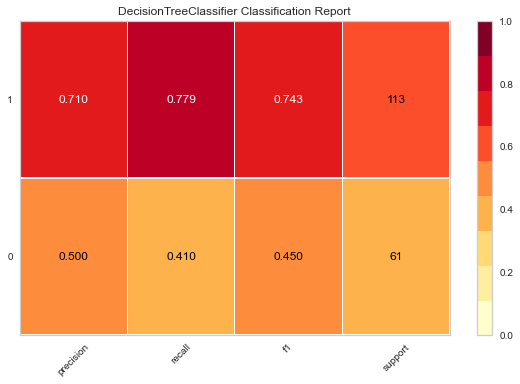

In [26]:
from yellowbrick.classifier import ClassificationReport

vizualizer_CR = ClassificationReport(final_DT, support=True)
vizualizer_CR.fit(X_train, y_train)
vizualizer_CR.score(X_test, y_test)
vizualizer_CR.show();

In [27]:
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_test, s_predictions)*100)

Accuracy: 64.9425287356322


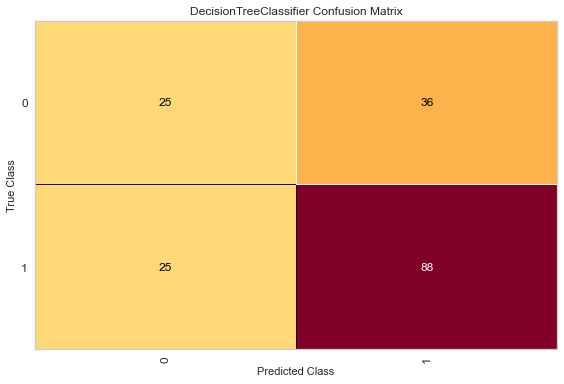

In [28]:
from yellowbrick.classifier import ConfusionMatrix

vizualizer_cm = ConfusionMatrix(final_DT, support=True, label_encoder={1: 'Malignant', 0: 'Benign'})
vizualizer_cm.fit(X_train, y_train)
vizualizer_cm.score(X_test, y_test)
vizualizer_cm.show();

AUC: 0.594298564


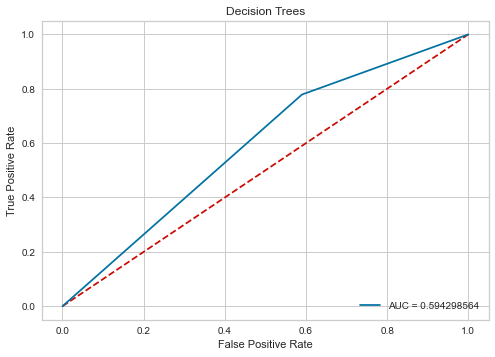

In [29]:
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.metrics import roc_curve
auc_dt = roc_auc_score(y_test, s_predictions)
print('AUC: %0.9f' % auc_dt)
fpr, tpr, thresholds = roc_curve(y_test, s_predictions)
pyplot.title("Decision Trees")
pyplot.ylabel('True Positive Rate')
pyplot.xlabel('False Positive Rate')
pyplot.plot([0, 1], [0, 1], 'r--')
pyplot.plot(fpr, tpr, 'b', label = 'AUC = %0.9f' % auc_dt)
pyplot.legend(loc = 'lower right')
pyplot.show()

In [30]:
#XGBoosting

In [31]:
from xgboost import XGBClassifier


parameters_xg = {
    'max_depth': range (20, 30, 50),
    'n_estimators': range(60, 220, 40),
    'learning_rate': [0.1, 0.01, 0.5]
}

XGB = GridSearchCV(
    estimator=XGBClassifier(),
    param_grid=parameters_xg,
    n_jobs = 10,
    cv = x,
    verbose=True
)

#Train the model using the training sets
XGB.fit(X_train, y_train)

#Predict the response for test dataset
XGB_pred = XGB.predict(X_test)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[20:25:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [32]:
print('The best score with CV =', x, 'is', XGB.score(X_test, y_test), 'with parameters =\n\n', XGB.best_params_, '\n\n')

The best score with CV = 3 is 0.6494252873563219 with parameters =

 {'learning_rate': 0.01, 'max_depth': 20, 'n_estimators': 60} 




In [33]:
results_XGB = XGB.cv_results_

In [34]:
print(results_XGB.get('params'))
print(XGB.best_params_)
print(XGB.best_score_)
final_XGB = XGB.best_estimator_

[{'learning_rate': 0.1, 'max_depth': 20, 'n_estimators': 60}, {'learning_rate': 0.1, 'max_depth': 20, 'n_estimators': 100}, {'learning_rate': 0.1, 'max_depth': 20, 'n_estimators': 140}, {'learning_rate': 0.1, 'max_depth': 20, 'n_estimators': 180}, {'learning_rate': 0.01, 'max_depth': 20, 'n_estimators': 60}, {'learning_rate': 0.01, 'max_depth': 20, 'n_estimators': 100}, {'learning_rate': 0.01, 'max_depth': 20, 'n_estimators': 140}, {'learning_rate': 0.01, 'max_depth': 20, 'n_estimators': 180}, {'learning_rate': 0.5, 'max_depth': 20, 'n_estimators': 60}, {'learning_rate': 0.5, 'max_depth': 20, 'n_estimators': 100}, {'learning_rate': 0.5, 'max_depth': 20, 'n_estimators': 140}, {'learning_rate': 0.5, 'max_depth': 20, 'n_estimators': 180}]
{'learning_rate': 0.01, 'max_depth': 20, 'n_estimators': 60}
0.7185185185185184


In [35]:
XGB_predictions = XGB.predict(X_test)

In [36]:
print(classification_report(y_test, XGB_predictions))
print(confusion_matrix(y_test, XGB_predictions))

              precision    recall  f1-score   support

           0       0.50      0.25      0.33        61
           1       0.68      0.87      0.76       113

    accuracy                           0.65       174
   macro avg       0.59      0.56      0.55       174
weighted avg       0.62      0.65      0.61       174

[[15 46]
 [15 98]]


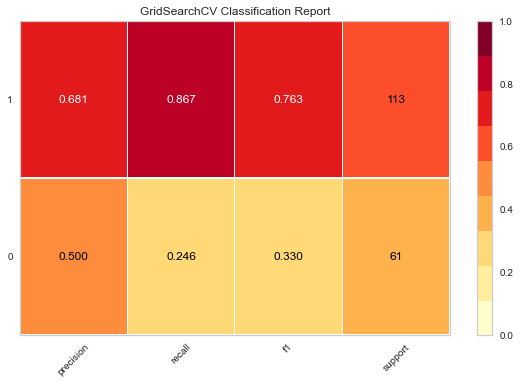

In [37]:
vizualizer_XGB = ClassificationReport(XGB, support=True)
vizualizer_XGB.fit(X_train, y_train)
vizualizer_XGB.score(X_test, y_test)
vizualizer_XGB.show();

In [38]:
print("Accuracy:", metrics.accuracy_score(y_test, XGB_predictions)*100)

Accuracy: 64.9425287356322


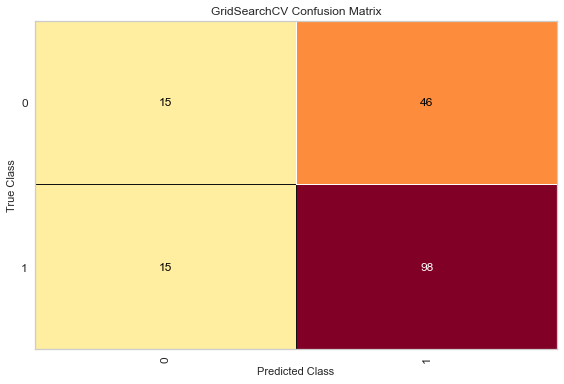

In [39]:
vizualizer_XGB2 = ConfusionMatrix(XGB, support=True)
vizualizer_XGB2.fit(X_train, y_train)
vizualizer_XGB2.score(X_test, y_test)
vizualizer_XGB2.show();

AUC: 0.556579138


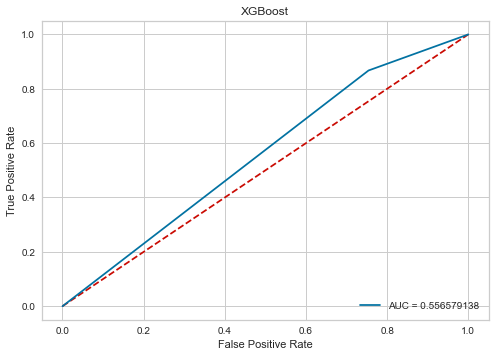

In [40]:
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.metrics import roc_curve
auc_xg = roc_auc_score(y_test, XGB_predictions)
print('AUC: %0.9f' % auc_xg)
fpr, tpr, thresholds = roc_curve(y_test, XGB_predictions)
pyplot.title("XGBoost")
pyplot.ylabel('True Positive Rate')
pyplot.xlabel('False Positive Rate')
pyplot.plot([0, 1], [0, 1], 'r--')
pyplot.plot(fpr, tpr, 'b', label = 'AUC = %0.9f' % auc_xg)
pyplot.legend(loc = 'lower right')
pyplot.show()

In [ ]:
#Naive Bayes

In [42]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import CategoricalNB
params_nb = {}
naive_bayes_1 = GridSearchCV(GaussianNB(), params_nb, cv = x)
naive_bayes_1.fit(X_train , y_train)
y_predicted_1 = naive_bayes_1.predict(X_test)

In [43]:
metrics.accuracy_score(y_predicted_1 , y_test)

0.6091954022988506

In [44]:
print(classification_report(y_test, y_predicted_1))
print(confusion_matrix(y_test,  y_predicted_1))

              precision    recall  f1-score   support

           0       0.47      0.97      0.63        61
           1       0.96      0.42      0.58       113

    accuracy                           0.61       174
   macro avg       0.72      0.69      0.61       174
weighted avg       0.79      0.61      0.60       174

[[59  2]
 [66 47]]


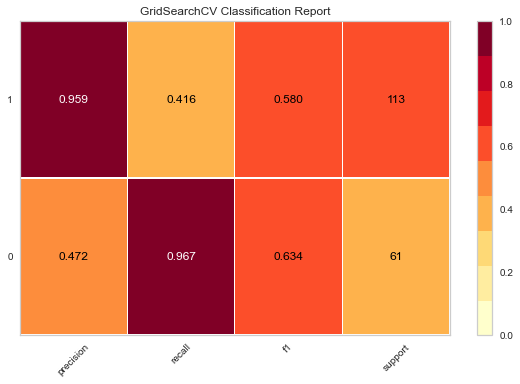

In [45]:
from yellowbrick.classifier import ClassificationReport

vizualizer_CR = ClassificationReport(naive_bayes_1, support=True)
vizualizer_CR.fit(X_train, y_train)
vizualizer_CR.score(X_test, y_test)
vizualizer_CR.show();

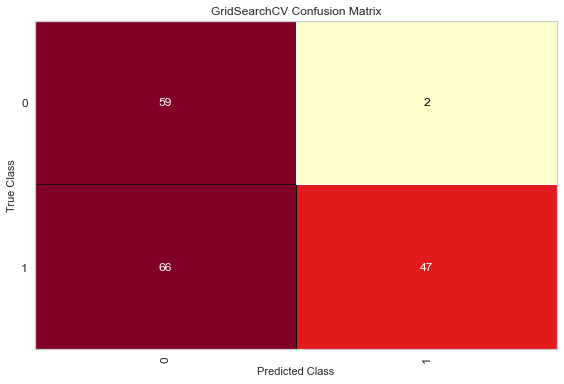

In [46]:
from yellowbrick.classifier import ConfusionMatrix

vizualizer_cm = ConfusionMatrix(naive_bayes_1, support=True, label_encoder={1: 'Malignant', 2: 'Benign'})
vizualizer_cm.fit(X_train, y_train)
vizualizer_cm.score(X_test, y_test)
vizualizer_cm.show();

AUC: 0.691571159


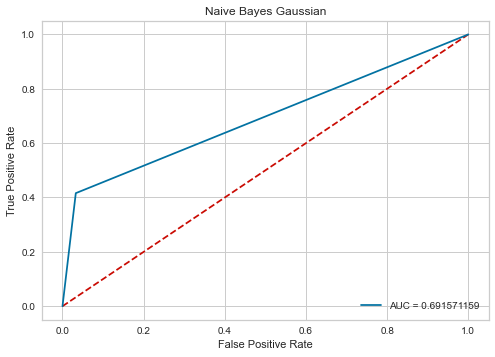

In [47]:
nbauc = roc_auc_score(y_test, y_predicted_1)
print('AUC: %0.9f' % nbauc)
fpr, tpr, thresholds = roc_curve(y_test, y_predicted_1)
pyplot.title("Naive Bayes Gaussian")
pyplot.ylabel('True Positive Rate')
pyplot.xlabel('False Positive Rate')
pyplot.plot([0, 1], [0, 1], 'r--')
pyplot.plot(fpr, tpr, 'b', label = 'AUC = %0.9f' % nbauc)
pyplot.legend(loc = 'lower right')
pyplot.show()

In [ ]:
#RandomForest

In [48]:
from sklearn.ensemble import RandomForestClassifier

In [49]:
parameters_rf = {
    'n_estimators'      : [320,330,340],
    'max_depth'         : [80, 90, 100, 110]
}

clf = GridSearchCV(RandomForestClassifier(), parameters_rf, cv=x, n_jobs=-1)
clf.fit(X_train, y_train)


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [80, 90, 100, 110],
                         'n_estimators': [320, 330, 340]})

In [50]:
print(clf.score(X_train, y_train))
print(clf.best_params_)

1.0
{'max_depth': 80, 'n_estimators': 330}


In [51]:
result = clf.predict(X_test)

In [52]:
metrics.accuracy_score(result , y_test)

0.6666666666666666

In [53]:
print(classification_report(y_test, result))
print(confusion_matrix(y_test, result))

              precision    recall  f1-score   support

           0       0.57      0.20      0.29        61
           1       0.68      0.92      0.78       113

    accuracy                           0.67       174
   macro avg       0.63      0.56      0.54       174
weighted avg       0.64      0.67      0.61       174

[[ 12  49]
 [  9 104]]


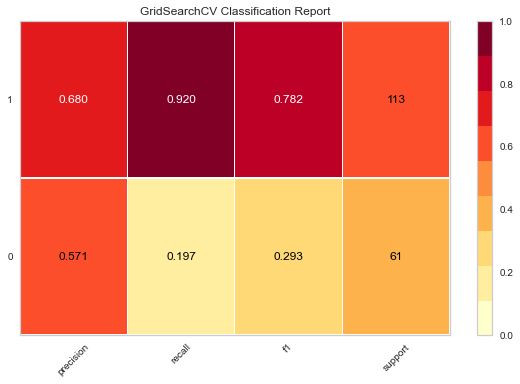

In [54]:
from yellowbrick.classifier import ClassificationReport

vizualizer_rf = ClassificationReport(clf, support=True)
vizualizer_rf.fit(X_train, y_train)
vizualizer_rf.score(X_test, y_test)
vizualizer_rf.show();

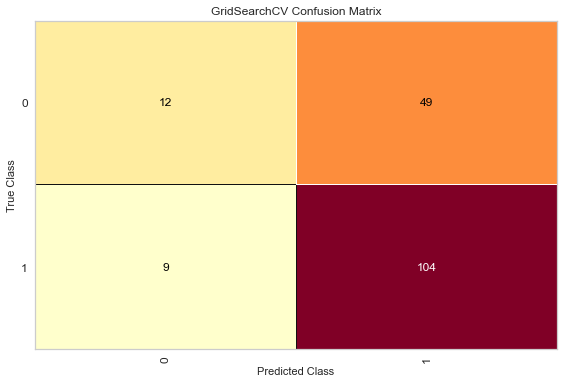

In [55]:
from yellowbrick.classifier import ConfusionMatrix

vizualizer_rf1 = ConfusionMatrix(clf, support=True, label_encoder={1: 'Malignant', 2: 'Benign'})
vizualizer_rf1.fit(X_train, y_train)
vizualizer_rf1.score(X_test, y_test)
vizualizer_rf1.show();

AUC: 0.558537647


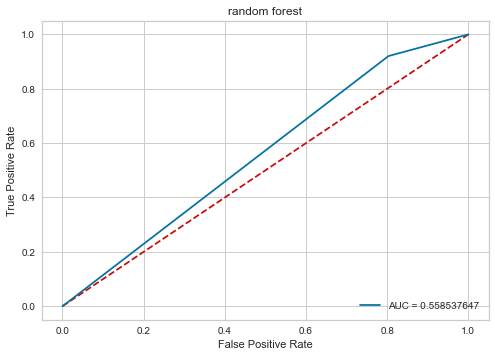

In [56]:
aucrf = roc_auc_score(y_test, result)
print('AUC: %0.9f' % aucrf)
fpr, tpr, thresholds = roc_curve(y_test, result)
pyplot.title("random forest")
pyplot.ylabel('True Positive Rate')
pyplot.xlabel('False Positive Rate')
pyplot.plot([0, 1], [0, 1], 'r--')
pyplot.plot(fpr, tpr, 'b', label = 'AUC = %0.9f' % aucrf)
pyplot.legend(loc = 'lower right')
pyplot.show()